In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_company = [x.split(' ')[0] for x in df["CarName"]]
df.insert(3, "car_company", car_company, True)
df.drop("CarName", axis=1, inplace=True)
df.head()

,car_ID,symboling,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
df['car_company'].replace(['maxda','Nissan','porcshce','toyouta','vokswagen','vw'],
          value=['mazda','nissan','porsche','toyota','volkswagen','volkswagen'],
                         inplace=True)
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

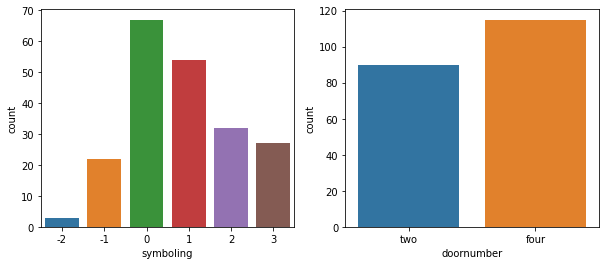

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='symboling',data=df)
plt.subplot(1,2,2)
sns.countplot(x='doornumber', data=df)
plt.show()

In [8]:
columns = np.array(df.columns)
columns = np.delete(columns, [0])
columns

array(['symboling', 'car_company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [9]:
small_range_feature = []
large_range_feature = []
for feature in columns:
    number_of_unique = len(df[feature].unique())
    if number_of_unique < 10:
        print(f"{feature}'s are = {df[feature].unique()}")
        small_range_feature.append(feature)
    else:
        print(f"no. of unique values in {feature} = {number_of_unique}")
        large_range_feature.append(feature)
    print()

symboling's are = [ 3  1  2  0 -1 -2]

no. of unique values in car_company = 22

fueltype's are = ['gas' 'diesel']

aspiration's are = ['std' 'turbo']

doornumber's are = ['two' 'four']

carbody's are = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel's are = ['rwd' 'fwd' '4wd']

enginelocation's are = ['front' 'rear']

no. of unique values in wheelbase = 53

no. of unique values in carlength = 75

no. of unique values in carwidth = 44

no. of unique values in carheight = 49

no. of unique values in curbweight = 171

enginetype's are = ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber's are = ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

no. of unique values in enginesize = 44

fuelsystem's are = ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

no. of unique values in boreratio = 38

no. of unique values in stroke = 37

no. of unique values in compressionratio = 32

no. of unique values in horsepower = 59

no. of unique values in peakrpm 

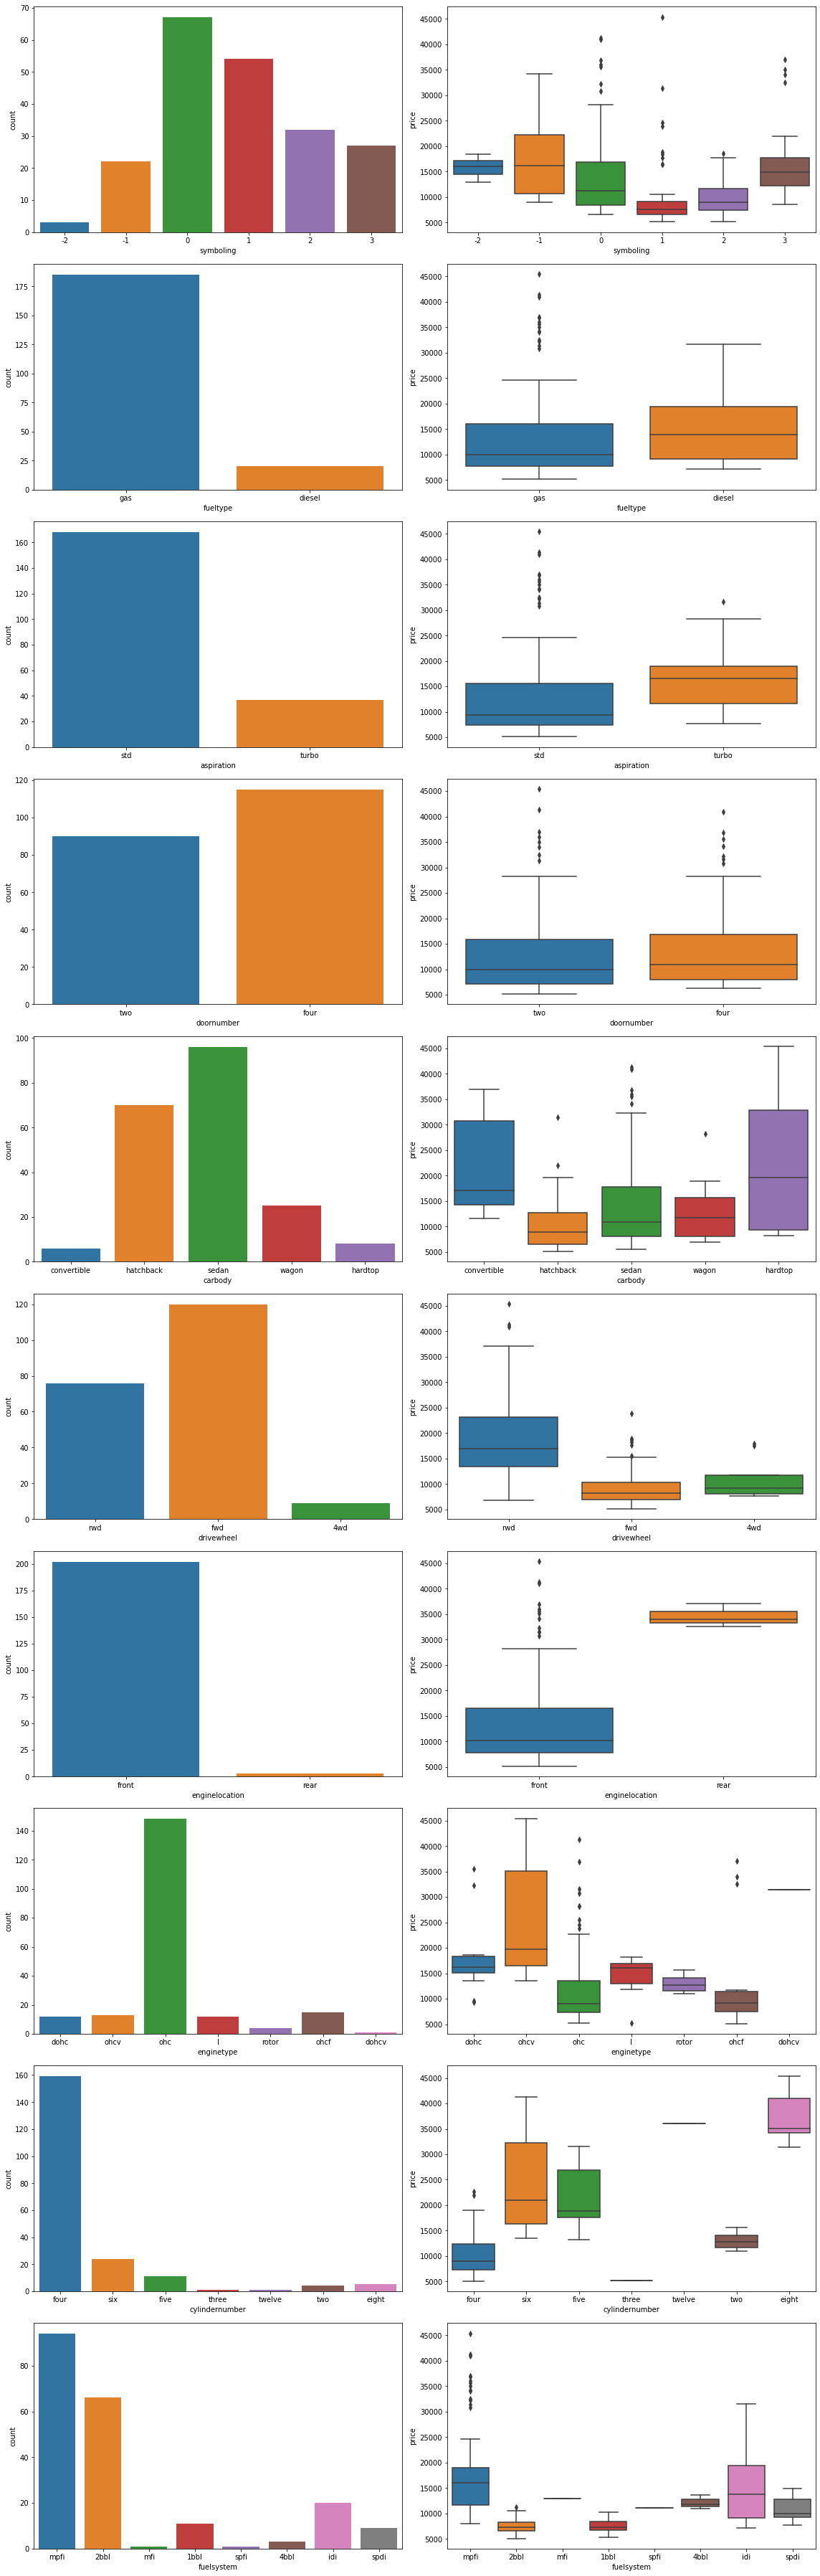

In [10]:
def count_box_plots(features, FIGSIZE=(16,6)):
    rows = int(len(features))
    fig, ax = plt.subplots(rows, 2, figsize=FIGSIZE)
    for i, feature in enumerate(features):
        sns.countplot(ax=ax[i, 0], x=feature, data=df)
        sns.boxplot(ax=ax[i, 1], x=feature, y='price', data=df)
    plt.tight_layout()
    plt.show()
    
count_box_plots(small_range_feature, FIGSIZE=(16,50))

Observations:<br/>
1. in "fueltype" -> gas is consumed in more amount while it has lower price and diesel is used less and its price is high<br/>
2. in "aspiration -> the relation beyween price and aspiration is invversely proportional but 'std' can have very high prices too while majority is used in low price cars
3. 'doornumber' -> not quite of difference but can slightly say that two door can have high price
4. 

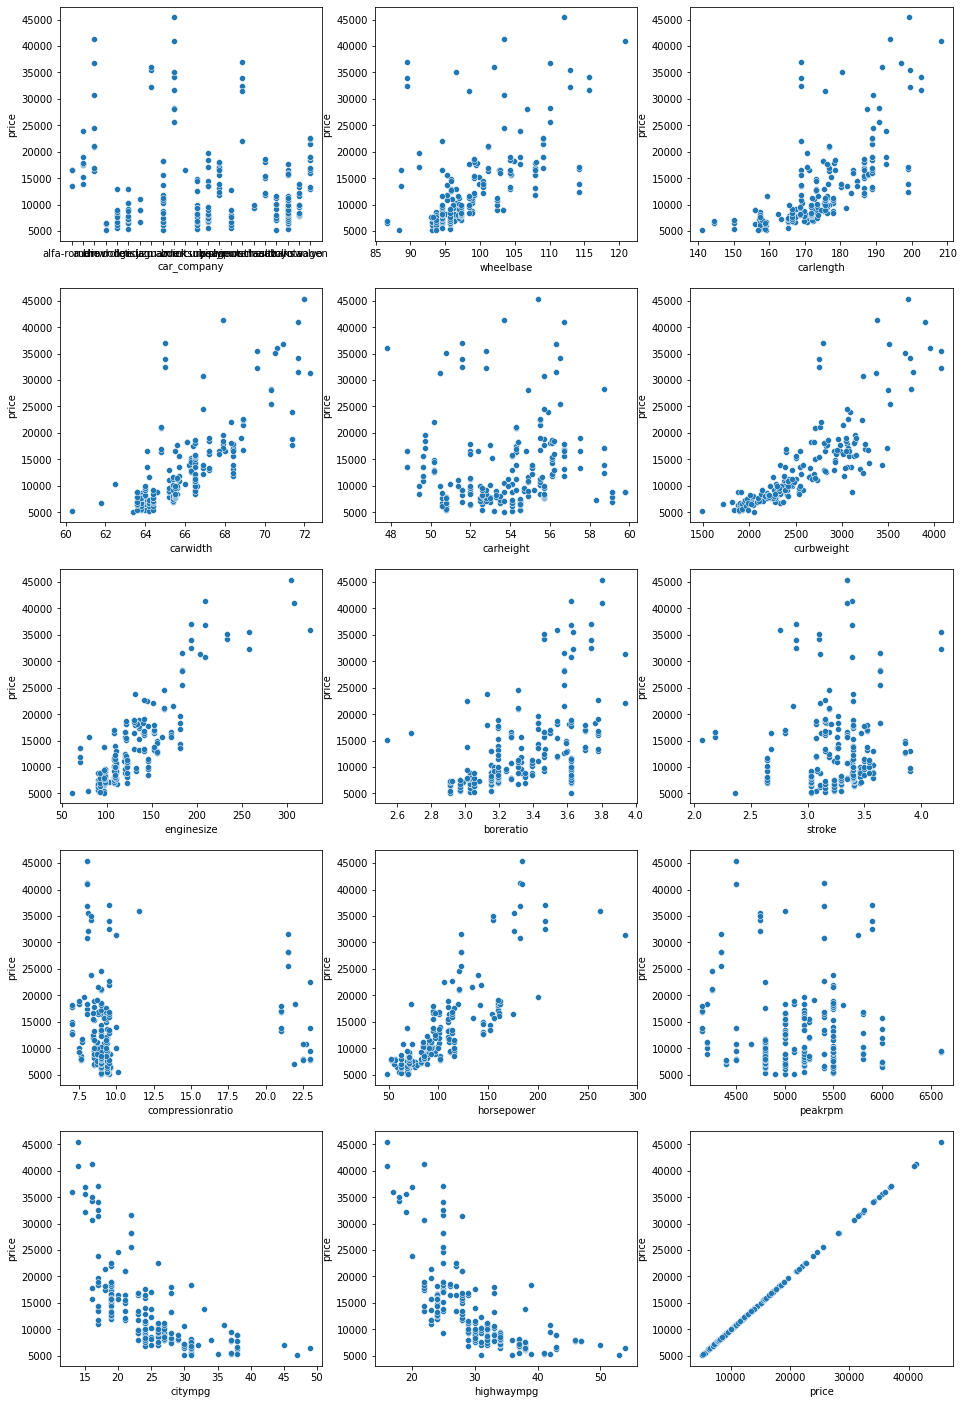

In [11]:
def scatterplots(features, FIGSIZE=(16,6)):
    rows = int(len(features)/3)
    fig, ax = plt.subplots(rows, 3, figsize=FIGSIZE)
    for i, feature in enumerate(features):
        sns.scatterplot(ax=ax[i//3, i%3], x=feature, y='price', data=df)
        
    plt.show()

scatterplots(large_range_feature, FIGSIZE=(16,25))

From the above scatter plots we will drop some features as they are not depending on the price<br/>
these features are : wheelbase, carheight, stroke, compressionratio, peakrpm

In [12]:
df2 = df.drop(['car_ID', 'car_company','wheelbase', 'carheight', 'stroke', 'compressionratio', 'peakrpm'], axis=1)
df2.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

[]

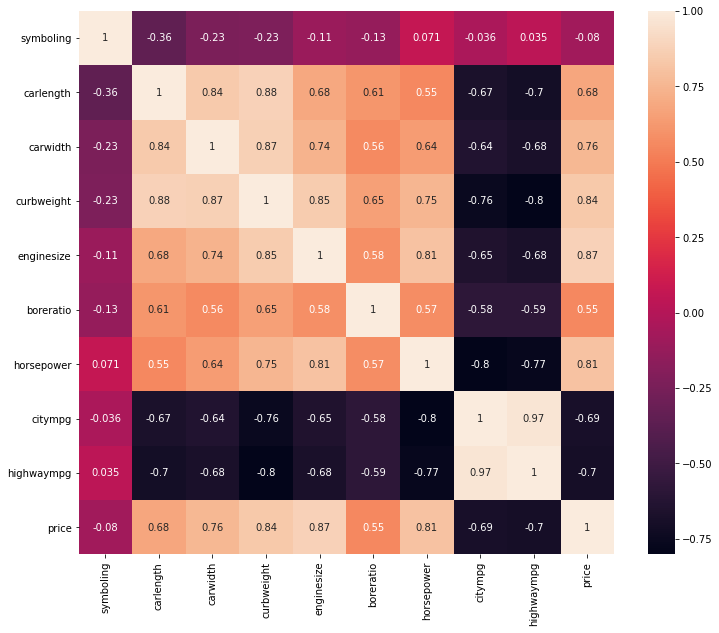

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot=True)
plt.plot()

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    int64  
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   curbweight      205 non-null    int64  
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  enginesize      205 non-null    int64  
 13  fuelsystem      205 non-null    object 
 14  boreratio       205 non-null    float64
 15  horsepower      205 non-null    int64  
 16  citympg         205 non-null    int64  
 17  highwaympg      205 non-null    int

In [15]:
final_dataset = pd.get_dummies(df2, drop_first=True)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   curbweight             205 non-null    int64  
 4   enginesize             205 non-null    int64  
 5   boreratio              205 non-null    float64
 6   horsepower             205 non-null    int64  
 7   citympg                205 non-null    int64  
 8   highwaympg             205 non-null    int64  
 9   price                  205 non-null    float64
 10  fueltype_gas           205 non-null    uint8  
 11  aspiration_turbo       205 non-null    uint8  
 12  doornumber_two         205 non-null    uint8  
 13  carbody_hardtop        205 non-null    uint8  
 14  carbody_hatchback      205 non-null    uint8  
 15  carbod

In [16]:
final_dataset.columns

Index(['symboling', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [17]:
final_dataset.head()

,symboling,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


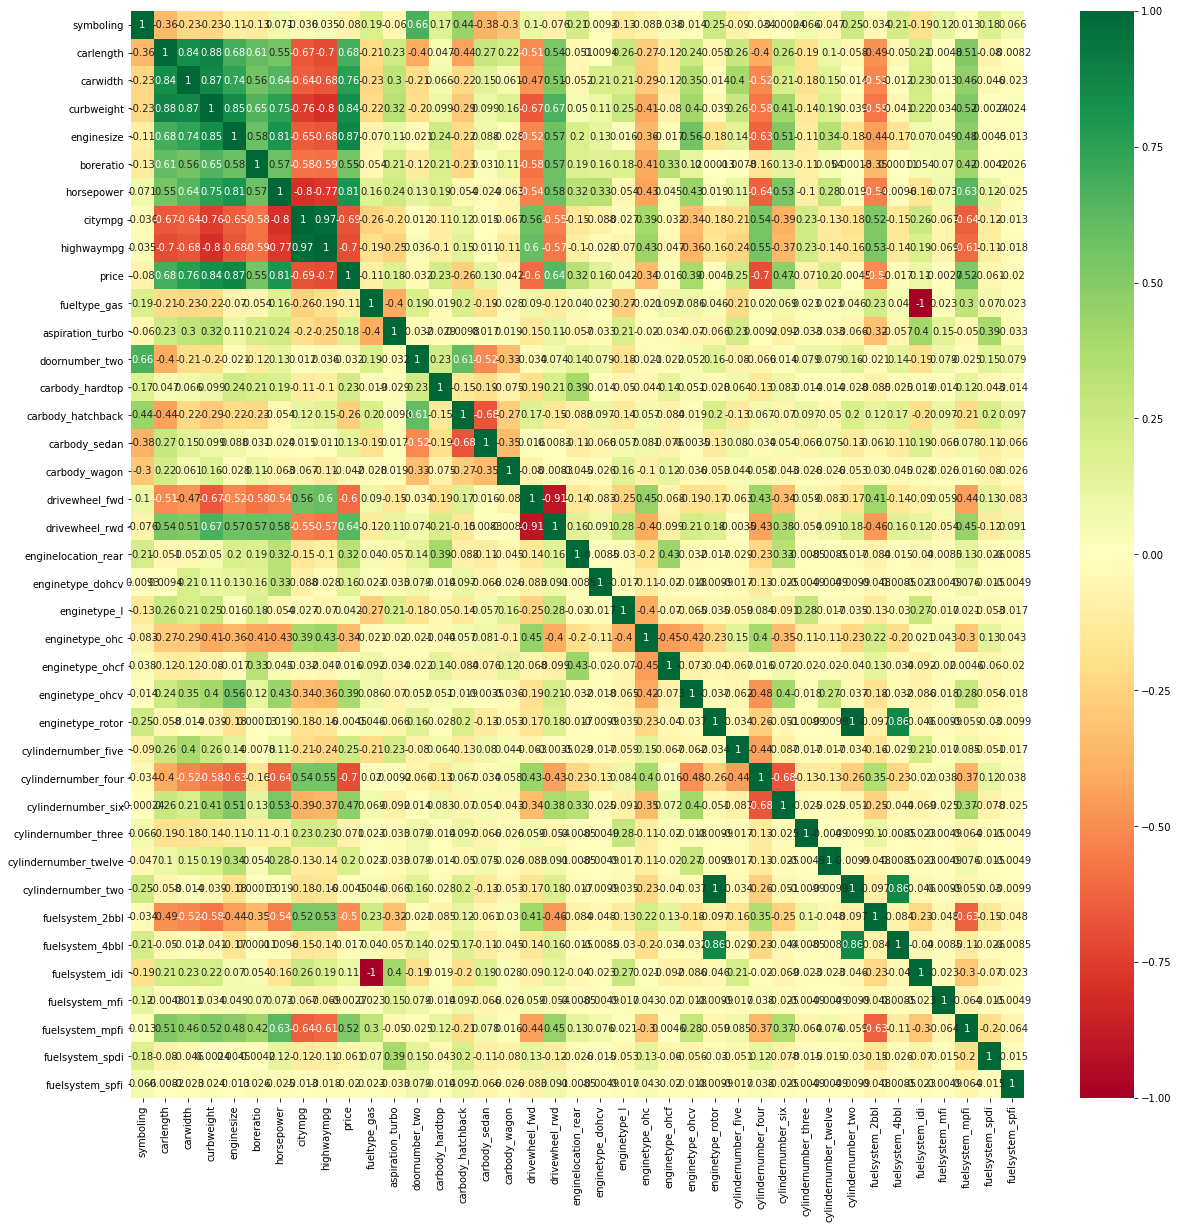

In [18]:
corrmat = final_dataset.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn")

In [19]:
y = final_dataset['price']
X = final_dataset.drop('price', axis=1)

In [22]:
X.columns

Index(['symboling', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [27]:
y.iloc[1]

16500.0

In [37]:
X.iloc[8]

symboling                   1.00
carlength                 192.70
carwidth                   71.40
curbweight               3086.00
enginesize                131.00
boreratio                   3.13
horsepower                140.00
citympg                    17.00
highwaympg                 20.00
fueltype_gas                1.00
aspiration_turbo            1.00
doornumber_two              0.00
carbody_hardtop             0.00
carbody_hatchback           0.00
carbody_sedan               1.00
carbody_wagon               0.00
drivewheel_fwd              1.00
drivewheel_rwd              0.00
enginelocation_rear         0.00
enginetype_dohcv            0.00
enginetype_l                0.00
enginetype_ohc              1.00
enginetype_ohcf             0.00
enginetype_ohcv             0.00
enginetype_rotor            0.00
cylindernumber_five         1.00
cylindernumber_four         0.00
cylindernumber_six          0.00
cylindernumber_three        0.00
cylindernumber_twelve       0.00
cylindernu

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [57]:
model.feature_importances_

array([3.65830585e-03, 2.25901121e-02, 3.67302877e-02, 1.16516583e-01,
       1.56480624e-01, 4.98659789e-02, 7.66987149e-02, 2.37861028e-02,
       2.65903704e-02, 3.79752168e-03, 9.37565720e-03, 2.52104365e-03,
       3.56538971e-03, 1.12957142e-02, 2.42141697e-03, 4.86827545e-04,
       7.05010337e-03, 3.59110126e-02, 7.56758582e-03, 1.89538211e-03,
       5.19526427e-04, 7.63055048e-03, 7.35883826e-03, 3.62651168e-03,
       8.71865453e-05, 1.61852823e-03, 3.49737507e-01, 2.95297498e-03,
       1.86319310e-04, 7.16096423e-05, 1.84388296e-04, 3.96434639e-03,
       2.16873146e-04, 5.92910918e-03, 3.16163604e-05, 1.67520192e-02,
       2.23810652e-04, 1.03550027e-04])

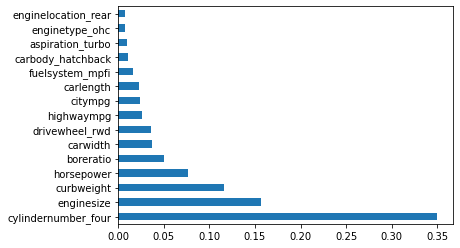

In [61]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(15).plot(kind='barh')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape

NameError: name 'X_train' is not defined

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_random = RandomForestRegressor()

In [66]:
##HyperParameters

# Number of Trees in Random Forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimumm number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
from sklearn.model_selection import RandomizedSearchCV


In [68]:
#Create the random grid
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
rf = RandomForestRegressor()

In [76]:
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter=10, cv=5,
                              verbose=2, random_state=42,
                              n_jobs=1)

In [77]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
prediction = rf_random.predict(X_test)

In [79]:
prediction

array([ 9691.72733333,  8610.574     ,  9648.047     ,  6004.569     ,
        7455.593     , 19939.5145    , 14285.08700333,  6201.546     ,
        8160.8445    , 17992.082338  , 11416.05366667, 19969.017     ,
       32513.6625    ,  8532.2655    ,  9732.142     ,  8199.18      ,
       15839.3475    ,  9892.70683333, 18722.439002  ,  9696.174     ,
       15873.671169  , 33726.054     , 10265.9935    ,  7316.978     ,
        8435.289     , 11044.12733333,  7588.5735    , 16047.32955829,
       17493.5215    ,  8366.455     ,  7215.7215    , 16401.035167  ,
        8149.029     , 17182.070839  , 13743.528     ,  9275.4315    ,
       12155.787167  ,  6363.403     , 16437.204     ,  6319.4415    ,
        6453.237     ])

/home/sugat-dhole/miniconda3/envs/car_pred/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

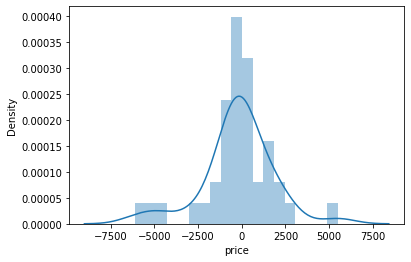

In [84]:
sns.distplot(y_test-prediction)

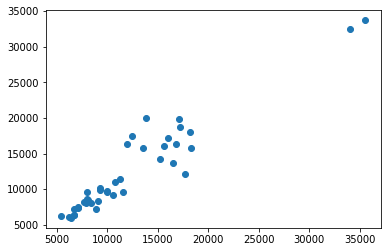

In [85]:
plt.scatter(y_test, prediction)

In [86]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regressor_model.pkl', 'wb')

#dump information to the file
pickle.dump(rf_random, file)